# Colab: a Jupyter Notebook

In [1]:
1+1

2

Hello I am a text: 1+1

In [2]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

apple
banana
cherry


Image

## Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, prepare matplotlib, if in colab: load additional packages for rendering

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get update >/dev/null
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [4]:
import sys
if 'google.colab' in sys.modules:
    !pip install easyagents >/dev/null

# Our Goal

## Step 1: Play the Game

In [5]:
import gym

env = gym.make("CartPole-v1")

In [6]:
env.reset()

array([ 0.03357613,  0.01221862, -0.04673739,  0.02324534])

In [7]:
env.step(1)

(array([ 0.0338205 ,  0.20797858, -0.04627248, -0.28380975]), 1.0, False, {})

In [8]:
env.action_space.n

2

In [9]:
env.observation_space.shape[0]

4

In [10]:
done = False
rewards = 0
env.reset()

array([-0.04023782,  0.02834233,  0.04037247, -0.04887779])

In [11]:
(observation,reward,done,info)=env.step(1)
rewards += reward
print( "rewards=", rewards, "observation=", observation )
if done:
  print( "--- game over ---" )

rewards= 1.0 observation= [-0.03967097  0.22286282  0.03939491 -0.32855448]


In [12]:
from random import randint

done = False
rewards = 0
env.reset()
while not done:
  action = randint(0,1)
  (observation,reward,done,info)=env.step(action)
  rewards += reward
  print( "action=", action, "rewards=", rewards, "observation=", observation )
print( "--- game over ---" )

action= 1 rewards= 1.0 observation= [-0.03447922  0.16038448  0.01067503 -0.25291574]
action= 0 rewards= 2.0 observation= [-0.03127153 -0.03488826  0.00561672  0.04311509]
action= 0 rewards= 3.0 observation= [-0.0319693  -0.2300903   0.00647902  0.33756484]
action= 0 rewards= 4.0 observation= [-0.0365711  -0.42530385  0.01323032  0.63228383]
action= 1 rewards= 5.0 observation= [-0.04507718 -0.23036896  0.025876    0.34379668]
action= 1 rewards= 6.0 observation= [-0.04968456 -0.0356245   0.03275193  0.05938447]
action= 1 rewards= 7.0 observation= [-0.05039705  0.15901292  0.03393962 -0.22278774]
action= 0 rewards= 8.0 observation= [-0.04721679 -0.03657728  0.02948386  0.08040494]
action= 0 rewards= 9.0 observation= [-0.04794834 -0.23210921  0.03109196  0.38224236]
action= 1 rewards= 10.0 observation= [-0.05259052 -0.03744221  0.03873681  0.09952255]
action= 1 rewards= 11.0 observation= [-0.05333937  0.15710378  0.04072726 -0.18069174]
action= 1 rewards= 12.0 observation= [-0.05019729  0

# Choose your Weapons

In [13]:
env.reset()
env.step(1)

(array([ 0.01529093,  0.205087  , -0.0012015 , -0.29454714]), 1.0, False, {})

In [14]:
env.action_space.n

2

In [2]:
from easyagents.agents import PpoAgent, DqnAgent
from easyagents.callbacks import plot, duration

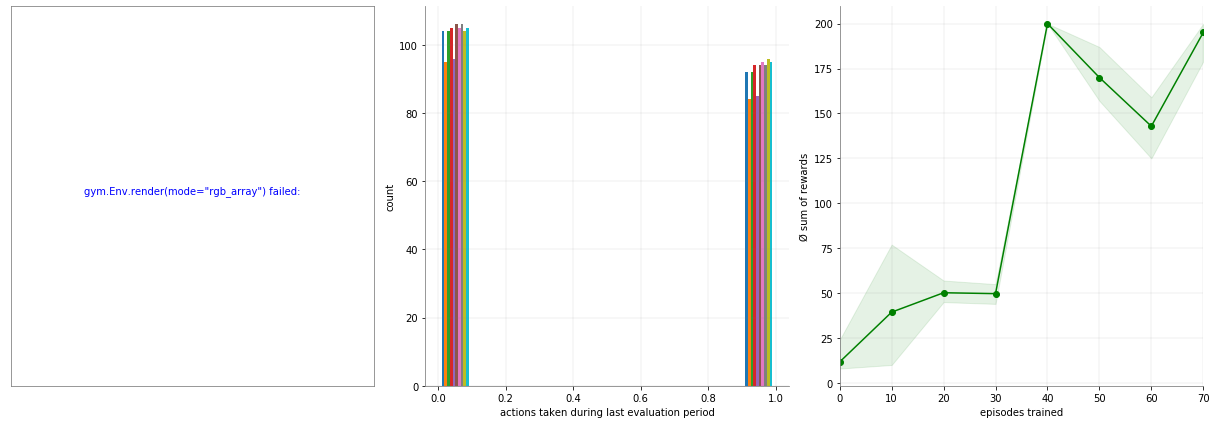

In [ ]:
ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100,100))
ppoAgent.train([plot.State(), plot.Actions(), plot.Rewards()], num_iterations=10, num_iterations_between_eval=1)

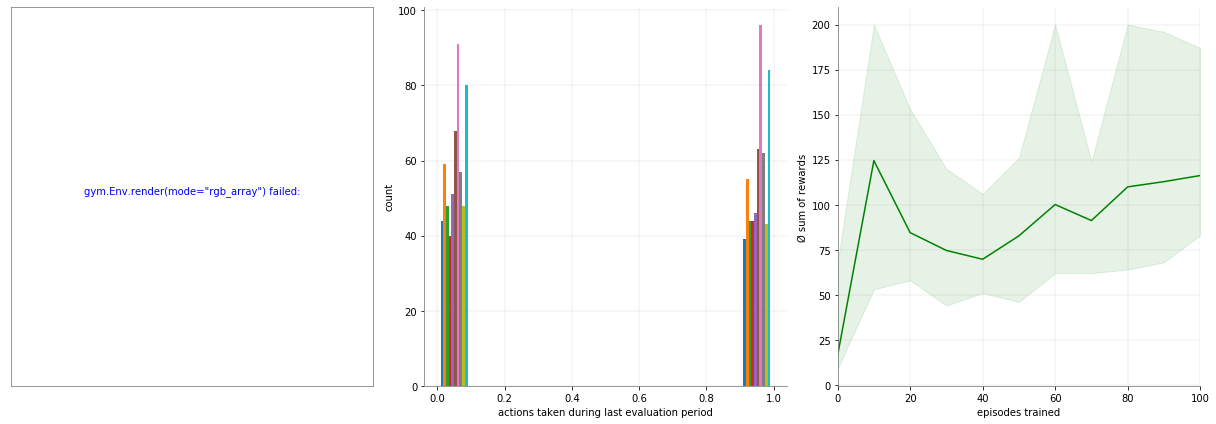

In [5]:
ppoAgent = PpoAgent('CartPole-v0', fc_layers=(10000))
ppoAgent.train([plot.State(), plot.Actions(), plot.Rewards()], num_iterations=10, num_iterations_between_eval=1)

In [ ]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import plot, duration

In [ ]:
%%time

ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100, 50, 25))
ppoAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()],
               num_iterations=10, num_iterations_between_eval=3)


In [ ]:
from easyagents.agents import DqnAgent
from easyagents.callbacks import plot

In [ ]:
%%time

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=20000, num_iterations_between_eval=1000)